# About the Data

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee ? 

# Data Description

1. Qualification: Qualification and degrees held by the doctor

2. Experience: Experience of the doctor in number of years

3. Rating: Rating given by patients

4. Profile: Type of the doctor

5. Miscellaeous_Info: Extra information about the doctor

6. Fees: Fees charged by the doctor

7. Place: Area and the city where the doctor is located.

# Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\DELL\\Documents\\Final Participant Data Folder\\Final_Train.csv")
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


1. We can observe that variable Miscellaneous_Info contains collective info about the Rating and Place so we will be removing it.

# EXPLORATORY DATA ANALYSIS

# Dealing with missing values

# Missing Place values

In [3]:
df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [4]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'Fees'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   object
 2   Rating         2659 non-null   object
 3   Place          5936 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 279.5+ KB


1. We have data missing in columns (Rating, Place).
2. Apart from fees all the data is not numerical.

In [6]:
df.isnull().sum()

Qualification       0
Experience          0
Rating           3302
Place              25
Profile             0
Fees                0
dtype: int64

In [7]:
#Chaning Experience column to numerical type removing 'years experience' part.
import re
df['Experience'] = df['Experience'].apply(lambda x : re.findall(r'^\d\d?', x)[0]).astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   int32 
 2   Rating         2659 non-null   object
 3   Place          5936 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int32(1), int64(1), object(4)
memory usage: 256.3+ KB


We will be fiding the missing place values by the means of average fees that is given for a particular place. Meaning, we will be calculating the average fees of all city and then assuming that what place it can be,

In [9]:
a=df.groupby('Place').mean()
a

,Experience,Fees
Place,,
"AECS Layout, Bangalore",9.000000,500.000000
"AS Rao Nagar, Hyderabad",15.875000,315.625000
"Abbigere, Bangalore",10.500000,100.000000
"Abhiramapuram, Chennai",26.500000,300.000000
"Abids, Hyderabad",16.000000,300.000000
...,...,...
"Yelahanka, Bangalore",13.366667,329.333333
"Yellareddyguda, Hyderabad",7.000000,750.000000
"Yeshwanthpur, Bangalore",15.833333,383.333333


As the data is large we need to seperate the place into city and area.

In [10]:
df['City'] = df['Place'].str.split(', ').str[-1]
df['Area'] = df['Place'].str.split(', ').str[0]
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,City,Area
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,250,Bangalore,Bannerghatta Road
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250,Chennai,Keelkattalai


In [11]:
df['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: City, dtype: int64

In [12]:
#We will be removing e from the data s it's not significant.
val = df[df['City'] == 'e'].index
val

Int64Index([3980], dtype='int64')

In [13]:
df = df.drop([3980])

In [14]:
df[df['City'].isna()]

,Qualification,Experience,Rating,Place,Profile,Fees,City,Area
91,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,100,NaN,NaN
502,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,100,NaN,NaN
599,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,100,NaN,NaN
605,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,100,NaN,NaN
724,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,100,NaN,NaN
1002,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,100,NaN,NaN
1083,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,100,NaN,NaN
1210,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,100,NaN,NaN
2078,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,100,NaN,NaN
2178,Get inspired by remarkable stories of people l...,0,NaN,NaN,Dermatologists,100,NaN,NaN


In [15]:
#Mean Fees of doctors in Every City
a=df.groupby('City').mean()
a

,Experience,Fees
City,,
Bangalore,16.054054,328.842607
Chennai,18.014035,283.602339
Coimbatore,16.785088,154.298246
Delhi,18.640506,362.911392
Ernakulam,16.712418,188.431373
Hyderabad,15.904311,307.507886
Mumbai,18.488105,308.292863
Thiruvananthapuram,15.941860,167.267442


In [16]:
#Mean Fees of doctors based on thier rating
a=df.groupby('Rating').mean()
a.Fees

Rating
100%    316.564327
33%     575.000000
36%     600.000000
40%     700.000000
45%     500.000000
47%     650.000000
48%     800.000000
53%     100.000000
55%     450.000000
56%     320.000000
57%     300.000000
58%     550.000000
60%     307.142857
62%     300.000000
63%     525.000000
64%     500.000000
65%     100.000000
67%     504.166667
68%     520.000000
69%     475.000000
7%      100.000000
70%     250.000000
71%     351.111111
72%     416.666667
73%     443.750000
74%     500.000000
75%     331.250000
76%     255.555556
77%     484.375000
78%     408.333333
79%     465.384615
80%     400.000000
81%     429.166667
82%     377.391304
83%     326.190476
84%     450.000000
85%     370.370370
86%     371.428571
87%     339.285714
88%     367.073171
89%     442.738095
90%     353.030303
91%     404.166667
92%     364.090909
93%     356.422018
94%     362.173913
95%     365.842697
96%     332.500000
97%     346.058091
98%     314.758621
99%     317.374517
Name: Fees, dtype: float

In [17]:
a=df.groupby('Profile').mean()
a.Fees

Profile
Ayurveda            238.968193
Dentist             238.191261
Dermatologists      393.133462
ENT Specialist      387.321429
General Medicine    313.908781
Homeopath           306.499407
Name: Fees, dtype: float64

In [18]:
#Mean Fees of doctors based on thier Experience
a=df.groupby('Experience').mean()
a.Fees

Experience
0     197.931034
2     240.579710
3     257.747748
4     273.643478
5     292.553191
         ...    
60    100.000000
61    100.000000
64    100.000000
65    100.000000
66    100.000000
Name: Fees, Length: 64, dtype: float64

In [19]:
a=df.groupby('City').mean()
a.Fees

City
Bangalore             328.842607
Chennai               283.602339
Coimbatore            154.298246
Delhi                 362.911392
Ernakulam             188.431373
Hyderabad             307.507886
Mumbai                308.292863
Thiruvananthapuram    167.267442
Name: Fees, dtype: float64

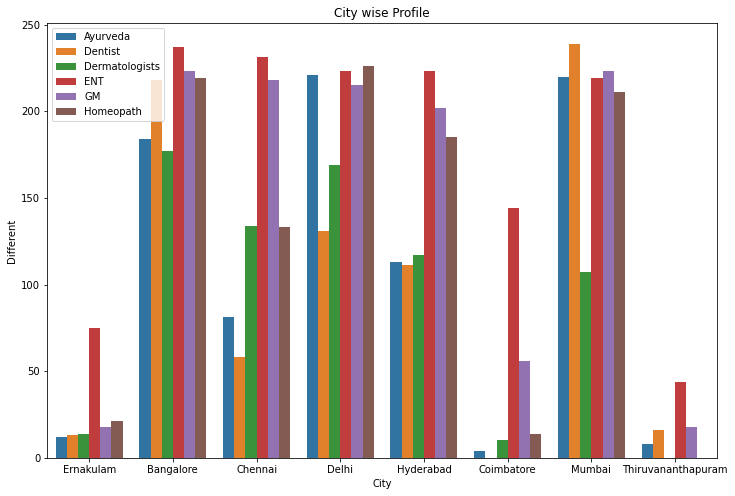

In [20]:
#City vs Profile 
plt.subplots(figsize=(12,8))
sns.countplot(x='City',hue='Profile',data=df)
plt.title("City wise Profile")
plt.xlabel("City")
plt.ylabel("Different")
plt.legend(['Ayurveda','Dentist','Dermatologists','ENT','GM','Homeopath']);
plt.xticks(rotation=0);

So by all this we can observe that from missing data:
1. Most of them dermatologists and are present in Bangalore,Delhi & Chennai.
2. Most of them are inexperienced (0 years of experience).
3. Most of them have fees only of 100rs only.

1. So we will be filling missing columns of city randomly from Bangalore, Delhi & Chennai as most of the chance of dermatologists are from these places.

In [21]:
import random
col = ['Bangalore','Delhi', 'Chennai']
df["Place"].fillna(lambda x: random.choice(df[df[Place] != np.nan][col]), inplace =True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5960 non-null   object
 1   Experience     5960 non-null   int32 
 2   Rating         2659 non-null   object
 3   Place          5960 non-null   object
 4   Profile        5960 non-null   object
 5   Fees           5960 non-null   int64 
 6   City           5935 non-null   object
 7   Area           5935 non-null   object
dtypes: int32(1), int64(1), object(6)
memory usage: 555.8+ KB


As we can see that Place variable has no misiing data now.

# Missing Rating Values

In [23]:
#Chaning Rating to float
df['Rating'] = df['Rating'].str[0:-1].astype(float)

In [24]:
a=df.groupby('Profile')
a.Rating.mean()

Profile
Ayurveda            96.327957
Dentist             97.706016
Dermatologists      93.506270
ENT Specialist      89.315789
General Medicine    91.592308
Homeopath           96.657692
Name: Rating, dtype: float64

As we can conclude from the above data that doctors with zero experience have 0 rating and as the experience starts increasing the rating also starts increasing.

In [25]:
#Assigning ratings for the missing values
def fillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    Experience = cols[2]
    
    if pd.isnull(Rating):
        if Experience > 0:
            if Profile == 'Ayurveda':
                return 96
            elif Profile == 'Dentist':
                return 98
            elif Profile=='Dermatologists':
                return 94
            elif Profile=='ENT Specialist':
                return 89
            elif Profile=='General Medicine':
                return 92
            elif Profile=='Homeopath':
                return 97
        else:
            return 0
    else:
        return Rating

In [26]:
df['Rating']=df[['Rating','Profile','Experience']].apply(fillratings,axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5960 non-null   object 
 1   Experience     5960 non-null   int32  
 2   Rating         5960 non-null   float64
 3   Place          5960 non-null   object 
 4   Profile        5960 non-null   object 
 5   Fees           5960 non-null   int64  
 6   City           5935 non-null   object 
 7   Area           5935 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 555.8+ KB


Now all of our orignal dataset has no missing values.

In [28]:
df.describe()

,Experience,Rating,Fees
count,5960.000000,5960.000000,5960.000000
mean,17.303020,93.317282,307.954362
std,11.143489,11.971319,190.934916
min,0.000000,0.000000,5.000000
25%,9.000000,92.000000,150.000000
50%,14.000000,96.000000,300.000000
75%,23.000000,98.000000,500.000000
max,66.000000,100.000000,950.000000


Observations
- Experience varies from 0-66 years.
- Rating scale varies from 0-100.
- Fees varies from 5-950 rs.
- The difference between the mean and 50% is not high. This means we will not encounter much outliers.
- Standard Deviation is quite high in all three variables.

# Univariate Analysis

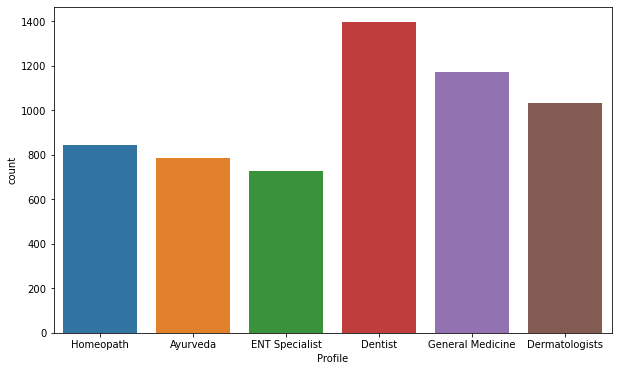

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(df["Profile"])
plt.show()

- Most of the Doctor Profile we have are either Dentist or General medicine.

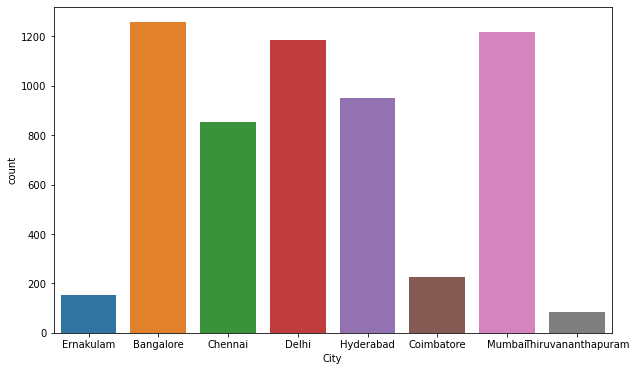

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(df["City"])
plt.show()

- Most of the Doctor in the dataset are from cities like Bangalore, Mumbai and Delhi.
- Least amount of the Doctor in the dataset are from cities like Thiruvananthpuram, Ernakulam and Coimbatore.

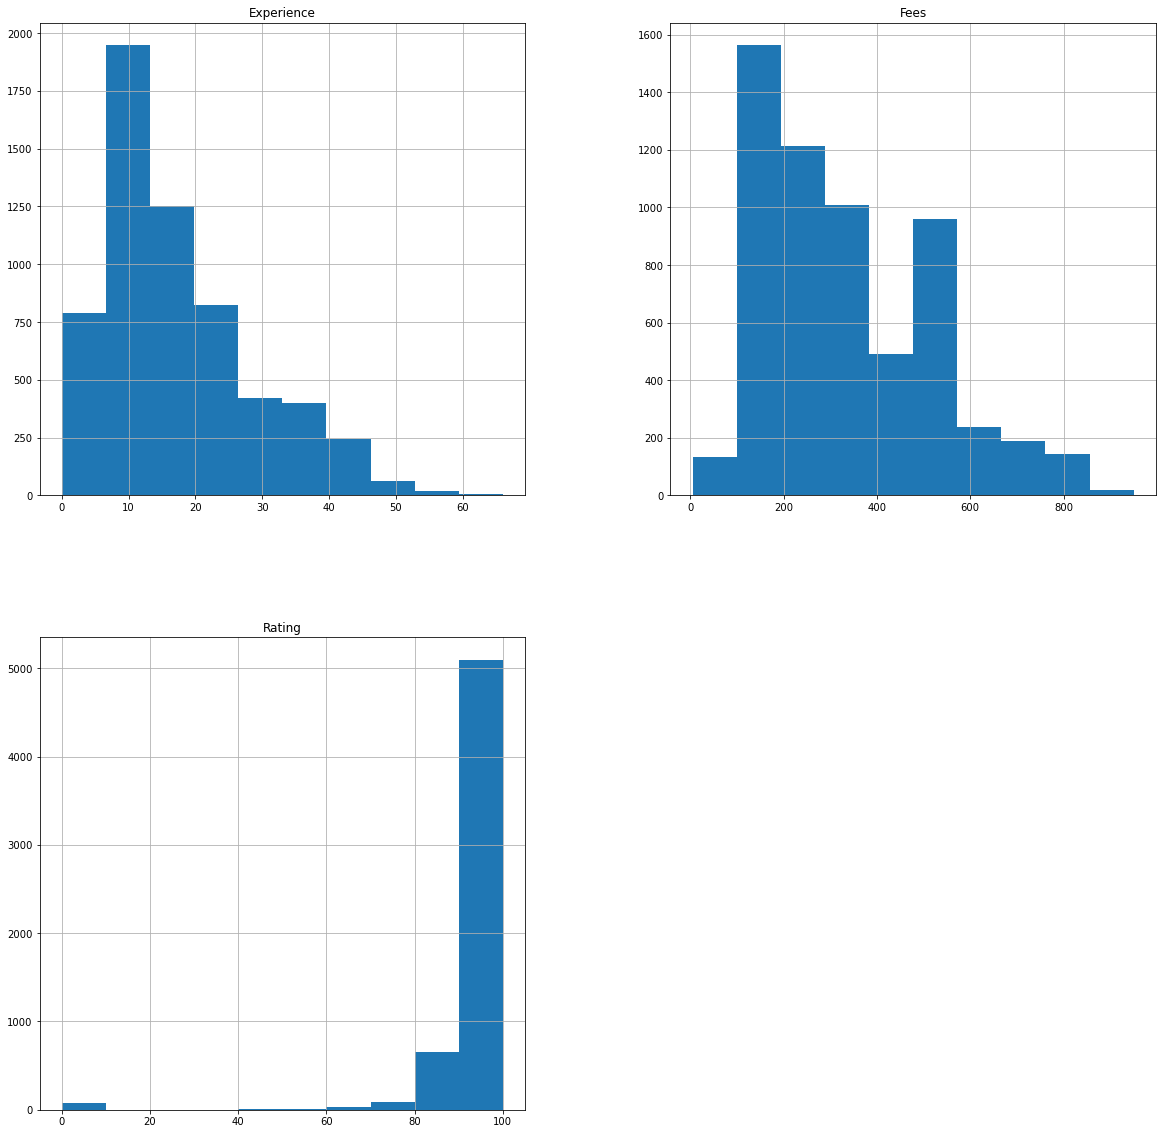

In [31]:
df.hist(figsize=(20,20))
plt.show()

- We can notice that for variables like Experience, Fees and Rating the graph is very skewed.

# Bi-Variate Analysis

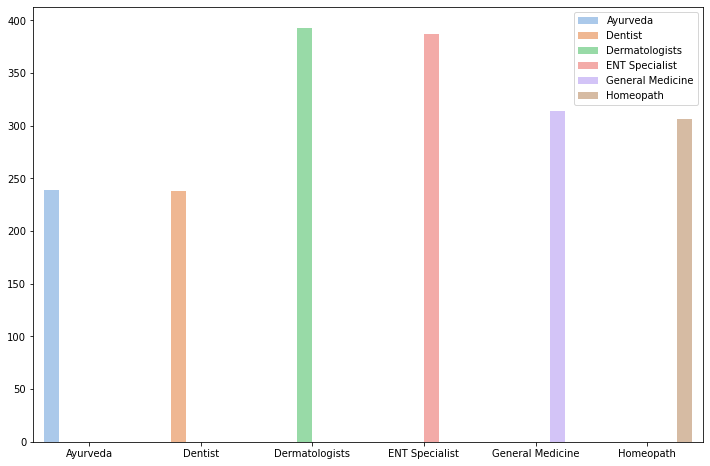

In [32]:
#Mean fees of doctors accorinding to thier profile
p=['Ayurveda','Dentist','Dermatologists','ENT Specialist','General Medicine','Homeopath']
b= [238.968193,238.191261,393.133462,387.321429,313.908781,306.499407]
plt.subplots(figsize=(12,8))
ax = sns.barplot(x=p, y=b,palette="pastel",orient='v',hue=p)
ax

- ENT specialist & Dermatologist are the most Fees among the profiles in dataset.

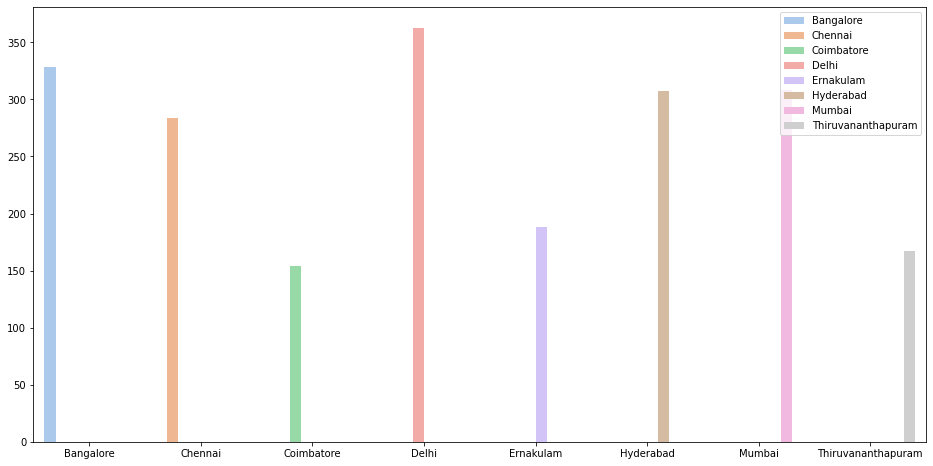

In [33]:
#Mean fees of doctors accorinding to the city they live.
p=['Bangalore','Chennai','Coimbatore','Delhi','Ernakulam','Hyderabad','Mumbai','Thiruvananthapuram']
b=[328.842607,283.602339,154.298246,362.911392,188.431373,307.507886,308.292863,167.267442]
plt.subplots(figsize=(16,8))
ax = sns.barplot(x=p, y=b,palette="pastel",orient='v',hue=p)
ax

- The average Fees is highest in Delhi > Bangalore > Mumbai.

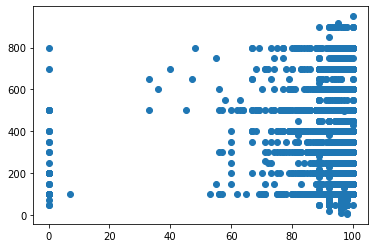

In [34]:
#Rating vs Fees Graph
plt.scatter(df['Rating'],df['Fees'])
plt.show()

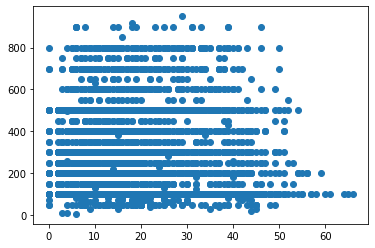

In [35]:
#Experience vs Fees Graph
plt.scatter(df['Experience'],df['Fees'])
plt.show()

- We cannot perfectly figure out a signicant relationship between the variables from above graphs. 

# Encoding The Non-Numerical Data

In [36]:
#Now we do'nt want this data.
df.drop(['City','Area'],axis=1,inplace=True)

In [37]:
#Label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# Encoding categorical columns
df['Profile']= le.fit_transform(df['Profile'])

In [38]:
df['Qualification'] = df['Qualification'].astype(str)
df['Place'] = df['Place'].astype(str)

In [39]:
#Label Encoding
col = ['Qualification','Place']
for i in col:
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    # Encoding categorical columns
    df[i]= le.fit_transform(df[i])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5960 non-null   int32  
 1   Experience     5960 non-null   int32  
 2   Rating         5960 non-null   float64
 3   Place          5960 non-null   int32  
 4   Profile        5960 non-null   int32  
 5   Fees           5960 non-null   int64  
dtypes: float64(1), int32(4), int64(1)
memory usage: 392.8 KB


Now all our data is numerical in nature so we will be finding its correlation now.

# Correlation

In [41]:
cor=df.corr()
cor

,Qualification,Experience,Rating,Place,Profile,Fees
Qualification,1.000000,0.134810,-0.148091,0.007049,0.393026,0.263187
Experience,0.134810,1.000000,0.030481,0.021201,0.202165,0.002143
Rating,-0.148091,0.030481,1.000000,0.053945,-0.090776,-0.002598
Place,0.007049,0.021201,0.053945,1.000000,0.020698,-0.048211
Profile,0.393026,0.202165,-0.090776,0.020698,1.000000,0.145192
Fees,0.263187,0.002143,-0.002598,-0.048211,0.145192,1.000000


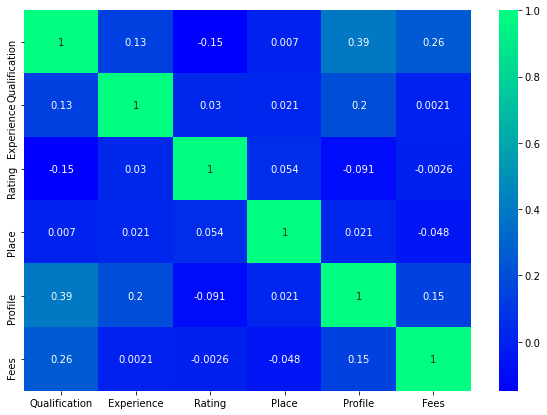

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(cor,annot=True,cmap="winter")

Observation
- This shows that Qualification and Profile are the biggest reason for high fees in the dataset.
- Whrereas other variable shows low correlation to the Fees.

# Plotting Outliers

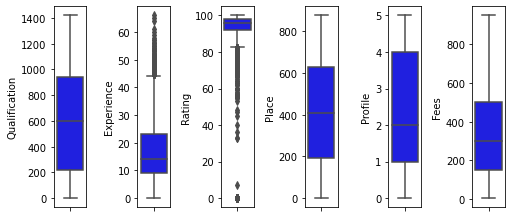

In [43]:
collist=df.columns.values
ncol=17
nrow=10
plt.figure(figsize=(20,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color="blue",orient="v")
    plt.tight_layout()

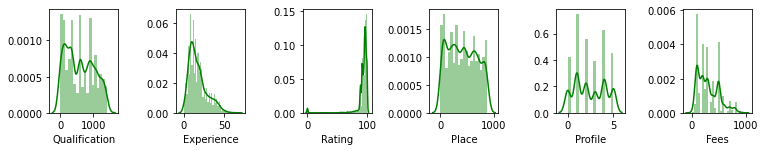

In [44]:
#Checking the distribution of outliers
plt.figure(figsize=(30,20))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]],color="green")
    plt.tight_layout()

As far as the treatment of the outliers among the variable is concerned:
    - Rating can be anywhere between 0-100 so we can not treat this.
    - Same is the case with Experience.
So we will not be treating the outliers.

# Removing Skewness

In [45]:
df.skew()

Qualification    0.239447
Experience       0.991306
Rating          -6.305971
Place            0.118770
Profile          0.108488
Fees             0.751676
dtype: float64

In [46]:
#Treating skewness via log method
for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])

# Removing Outliers

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47350339, 0.74467997, 0.55827424, 0.44042178, 1.54283843,
        1.33134202],
       [1.26615875, 0.20031059, 0.39119425, 1.74377375, 1.47300842,
        0.49749874],
       [1.30030463, 0.57945376, 0.36066571, 0.1682253 , 0.33649969,
        0.27187732],
       ...,
       [0.00226012, 1.49439001, 0.30765425, 0.7601541 , 0.93966906,
        1.28708978],
       [0.83631125, 0.09974951, 0.27712571, 1.6821386 , 0.93966906,
        1.33134202],
       [0.85533128, 0.26995803, 0.55827424, 0.73064602, 0.86983905,
        0.32097491]])

In [48]:
threshold=3
print(np.where(z>3))

(array([  55,   91,   91,  168,  168,  209,  309,  380,  380,  383,  383,
        409,  409,  502,  502,  599,  599,  602,  602,  605,  605,  616,
        640,  640,  692,  724,  724,  731,  870,  870,  911,  945,  945,
        973,  975,  975, 1002, 1002, 1083, 1083, 1122, 1122, 1142, 1170,
       1175, 1175, 1210, 1210, 1254, 1254, 1303, 1316, 1379, 1379, 1470,
       1470, 1553, 1553, 1560, 1560, 1605, 1605, 1659, 1659, 1727, 1727,
       1743, 1778, 1869, 1869, 1879, 1879, 1910, 1910, 1930, 2078, 2078,
       2089, 2091, 2178, 2178, 2283, 2283, 2328, 2328, 2391, 2563, 2585,
       2637, 2637, 2641, 2641, 2682, 2682, 2714, 2714, 2773, 2850, 2968,
       2968, 3090, 3090, 3099, 3099, 3125, 3125, 3126, 3177, 3177, 3228,
       3228, 3303, 3344, 3418, 3418, 3443, 3443, 3468, 3468, 3499, 3502,
       3502, 3604, 3720, 3720, 3744, 3744, 3804, 3804, 3896, 3896, 3963,
       4003, 4003, 4011, 4066, 4066, 4238, 4238, 4247, 4247, 4281, 4281,
       4289, 4294, 4337, 4337, 4390, 4390, 4426, 4

In [49]:
df_n=df[(z<3).all(axis=1)]

In [50]:
print("New Shape :",df_n.shape,"Old Shape :",df.shape)

New Shape : (5846, 6) Old Shape : (5960, 6)


# Scaling the data

In [52]:
#Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_n)
df=pd.DataFrame(x,columns=df_n.columns)

# Model Training

In [54]:
#Seperating the input and output data
x=df.drop(columns="Fees")
y=pd.DataFrame(df["Fees"])
#Coverting to train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [55]:
#Importing our models library
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [56]:
#Using algorithms via loop
models= [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(), Ridge(), ElasticNet()]
for m in models:
    m.fit(x_train,y_train)
    print("Score of ",m," :",m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Scores')
    print("Mean_Absolute_Error : ",mean_absolute_error(y_test,predm))
    print("Mean_Squared_Error : ",mean_squared_error(y_test,predm))
    print("Root_Mean_Absolute_Error : ",np.sqrt(mean_absolute_error(y_test,predm)))
    print("r2_score : ",r2_score(y_test,predm))     
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  LinearRegression()  : 0.0679589331454612
Scores
Mean_Absolute_Error :  0.7903364189168351
Mean_Squared_Error :  0.9060326672661367
Root_Mean_Absolute_Error :  0.8890086720144158
r2_score :  0.07204080232029297
--------------------------------------------------------------------------------------------


Score of  SVR()  : 0.15258126588222432
Scores
Mean_Absolute_Error :  0.7606371107148392
Mean_Squared_Error :  0.8888591962198078
Root_Mean_Absolute_Error :  0.8721451202150013
r2_score :  0.08962988159887253
--------------------------------------------------------------------------------------------


Score of  DecisionTreeRegressor()  : 0.9973258839532385
Scores
Mean_Absolute_Error :  0.9029254500107767
Mean_Squared_Error :  1.421213492278444
Root_Mean_Absolute_Error :  0.9502238946747112
r2_score :  -0.45560770563131237
--------------------------------------------------------------------------------------------


Score of  KNeighborsRegressor()  : 0.32960086608030525
Scores


In [57]:
#Cross Validation
from sklearn.model_selection import cross_val_score
models= [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(), Ridge(), ElasticNet()]
for m in models:
    score=cross_val_score(m,x,y,cv=4,scoring="r2")
    print("Score of ",m," is :",score)
    print("Mean Score : ",score.mean())
    print("Standard Deviation : ",score.std())
    print("--------------------------------------------------------------------------------------------")
    print("\n")

Score of  LinearRegression()  is : [0.0663953  0.05948847 0.0623835  0.0815691 ]
Mean Score :  0.06745909188912089
Standard Deviation :  0.008507590114024884
--------------------------------------------------------------------------------------------


Score of  SVR()  is : [0.09635275 0.09574415 0.09794695 0.12509525]
Mean Score :  0.10378477457866314
Standard Deviation :  0.012329875236256537
--------------------------------------------------------------------------------------------


Score of  DecisionTreeRegressor()  is : [-0.63772798 -0.5744274  -0.64401662 -0.61119989]
Mean Score :  -0.6168429741367427
Standard Deviation :  0.027411292839226067
--------------------------------------------------------------------------------------------


Score of  KNeighborsRegressor()  is : [-0.03192083 -0.00232857 -0.02101026  0.01295577]
Mean Score :  -0.010575973520645182
Standard Deviation :  0.01722091664848802
-------------------------------------------------------------------------------

We are getting best results using Support Vector Regressor.

In [61]:
#SVR is the best model so we will find out it's best parameter using GridSearchCV
from sklearn.model_selection import GridSearchCV
sv=SVR()
parameters = {'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'C': [1, 10, 100, 1000, 10000]}
clf=GridSearchCV(sv,parameters, refit = True, verbose = 3)
clf.fit(x,y)
clf.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.028, total=   2.7s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.037, total=   2.8s
[CV] C=1, gamma=1, kernel=rbf ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


[CV] ............ C=1, gamma=1, kernel=rbf, score=0.093, total=   2.5s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.094, total=   2.5s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.098, total=   2.5s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.072, total=   2.4s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.111, total=   2.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.112, total=   2.6s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.116, total=   2.7s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

KeyboardInterrupt: 

Best parameters are: C=1, gamma=0.2, kernel=rbf

In [64]:
#Using SVR method with best parameters
sv=SVR(C=1, gamma=0.2, kernel='rbf')
sv.fit(x_train,y_train)
print("Score of : ",sv.score(x_train,y_train))
predsv=sv.predict(x_test)
print('Scores')
print("Mean_Absolute_Error : ",mean_absolute_error(y_test,predsv))
print("Mean_Squared_Error : ",mean_squared_error(y_test,predsv))
print("Root_Mean_Absolute_Error : ",np.sqrt(mean_absolute_error(y_test,predsv)))
print("r2_score : ",r2_score(y_test,predsv))     
print("--------------------------------------------------------------------------------------------")
print("\n")

Score of :  0.15251610095494128
Scores
Mean_Absolute_Error :  0.7606304493656404
Mean_Squared_Error :  0.888824010411888
Root_Mean_Absolute_Error :  0.8721413012612351
r2_score :  0.08966591892430975
--------------------------------------------------------------------------------------------




In [65]:
#Cross Validaiting SVR
score=cross_val_score(sv,x,y,cv=4,scoring="r2")
print("Score is :",score)
print("Mean Score : ",score.mean())
print("Standard Deviation : ",score.std())
print("--------------------------------------------------------------------------------------------")
print("\n")

Score is : [0.0963322  0.09552391 0.09791609 0.12515725]
Mean Score :  0.10373236538936395
Standard Deviation :  0.012399556622269374
--------------------------------------------------------------------------------------------




As the score is still very low we will try to boost it by using Ensemble Methods

# Ensemble Methods

In [66]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("r2_score : ",rf.score(x_train,y_train))
print("mean_absolute_error : ",mean_absolute_error(y_test,predrf))
print("mean_squared_error : ",mean_squared_error(y_test,predrf))

r2_score :  0.8570781650835524
mean_absolute_error :  0.751275235562226
mean_squared_error :  0.8770853316879346


In [67]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor(n_estimators=20,random_state=59)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("r2_score : ",ad.score(x_train,y_train))
print("mean_absolute_error : ",mean_absolute_error(y_test,predad))
print("mean_squared_error : ",mean_squared_error(y_test,predad))

r2_score :  0.11765576899636121
mean_absolute_error :  0.781182427489023
mean_squared_error :  0.8664773487991282


# As Random Forest Regressor is giving best results we will be saving it using serialization.

In [68]:
import pickle
filename= "Fees.pkl"
pickle.dump(rf,open(filename,'wb'))

# Using Test Dataset

Giving it the same treatment as of above data

In [95]:
test_df=pd.read_csv("C:\\Users\\DELL\\Documents\\Final Participant Data Folder\\Final_Test.csv")
test_df.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
5,"BDS, MDS",14 years experience,90%,"Velachery, Chennai",Dentist,Acrylic Partial Denture Impaction / Impacted T...
6,"MBBS, Diploma in Otorhinolaryngology (DLO)",23 years experience,94%,"Frazer Town, Bangalore",ENT Specialist,"94% 6 Feedback Frazer Town, Bangalore"
7,"BDS, MDS - Pedodontics",9 years experience,94%,"Attapur, Hyderabad",Dentist,RCT - Root Canal Treatment Ceramic Veneers / C...
8,"MD - Ayurveda Medicine, BAMS, Yoga Teachers Tr...",11 years experience,99%,"Banashankari, Bangalore",Ayurveda,"99% 203 Feedback Banashankari, Bangalore"
9,BHMS,44 years experience,NaN,"Mayur Vihar Ph-I, Delhi",Homeopath,NaN


# Filling Empty Place data

In [96]:
test_df.drop(['Miscellaneous_Info'],axis=1,inplace=True)

In [97]:
import re
test_df['Experience'] = test_df['Experience'].apply(lambda x : re.findall(r'^\d\d?', x)[0]).astype(int)

In [98]:
import random
col = ['Bangalore','Delhi', 'Chennai']
test_df["Place"].fillna(lambda x: random.choice(test_df[test_df[Place] != np.nan][col]), inplace =True)

In [99]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  1987 non-null   object
 1   Experience     1987 non-null   int32 
 2   Rating         897 non-null    object
 3   Place          1987 non-null   object
 4   Profile        1987 non-null   object
dtypes: int32(1), object(4)
memory usage: 70.0+ KB


# Filling Empty Rating data

In [101]:
#Chaning Rating to float
test_df['Rating'] = test_df['Rating'].str[0:-1].astype(float)

In [102]:
#Assigning ratings for the missing values
def fillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    Experience = cols[2]
    
    if pd.isnull(Rating):
        if Experience > 0:
            if Profile == 'Ayurveda':
                return 96
            elif Profile == 'Dentist':
                return 98
            elif Profile=='Dermatologists':
                return 94
            elif Profile=='ENT Specialist':
                return 89
            elif Profile=='General Medicine':
                return 92
            elif Profile=='Homeopath':
                return 97
        else:
            return 0
    else:
        return Rating

In [103]:
test_df['Rating']=test_df[['Rating','Profile','Experience']].apply(fillratings,axis=1)

In [104]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  1987 non-null   object 
 1   Experience     1987 non-null   int32  
 2   Rating         1987 non-null   float64
 3   Place          1987 non-null   object 
 4   Profile        1987 non-null   object 
dtypes: float64(1), int32(1), object(3)
memory usage: 70.0+ KB


In [105]:
test_df['Qualification'] = test_df['Qualification'].astype(str)
test_df['Place'] = test_df['Place'].astype(str)

In [106]:
#Label Encoding
col = ['Profile','Qualification','Place']
for i in col:
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    # Encoding categorical columns
    test_df[i]= le.fit_transform(test_df[i])

In [107]:
#Load the model
fitted_model=pickle.load(open("Fees.pkl","rb"))

In [108]:
fitted_model

RandomForestRegressor(n_estimators=20, random_state=59)

In [109]:
#Prediction over Test data
predictions=fitted_model.predict(test_df)

In [110]:
predictions

array([0.12737208, 0.12737208, 0.12737208, ..., 0.12737208, 0.12737208,
       0.12737208])